# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [29]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Setting Global Variables for the lane extrapolation portion
PREVIOUS_LEFT_X1 = 0
PREVIOUS_LEFT_X2 = 0
PREVIOUS_RIGHT_X1 = 0
PREVIOUS_RIGHT_X2 = 0

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


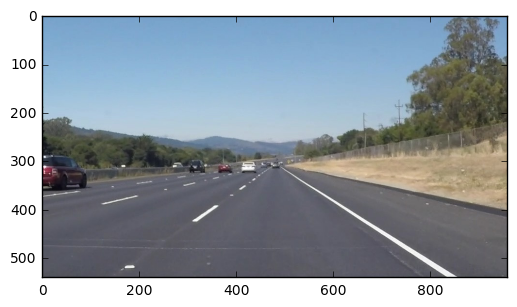

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image


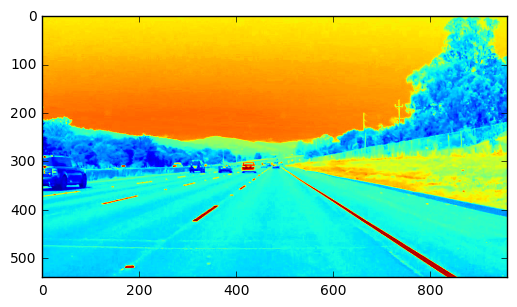

In [3]:
# Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show the gray image
plt.imshow(gray)

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

* `cv2.inRange()` for color selection  
* `cv2.fillPoly()` for regions selection  
* `cv2.line()` to draw lines on an image given endpoints  
* `cv2.addWeighted()` to coadd / overlay two images
* `cv2.cvtColor()` to grayscale or change color
* `cv2.imwrite()` to output images to file  
* `cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [4]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below

    """
    #### Line Lists - Left side and Right side ####
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([])
                            , minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
#     draw_lines5(line_img, lines, thickness=10)
#     draw_lines7(line_img, lines, thickness=10)
    draw_lines2(line_img, lines, thickness=10)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [12]:
def draw_lines2(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    
    Equations:
    Point Slope: m = (y2-y1)/(x2-x1)
    Equation of a line: y = mx + b
    Finding B from Eq of a line: b = y - mx
    Finding B without slope known given: b = y - x(y2-y1)/(x2-x1)
    
    1. Separate Lines
    2. Decide if segment is left or right
    3. Average the position of each line
    4. Extrapolate to the top and bottom of the line
    
    """
    global PREVIOUS_LEFT_X1, PREVIOUS_LEFT_X2, PREVIOUS_RIGHT_X1, PREVIOUS_RIGHT_X2
    
    left_x = []
    left_y = []
    right_x = []
    right_y = []
    
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            if (x2 != x1):
                #Filter for position and slope
                if x2>=img.shape[1]*.5 + 40 and ((y2-y1)/(x2-x1)) > 0:
                    right_x = right_x + [x1,x2]
                    right_y = right_y + [y1,y2]
                    
                if x2<img.shape[1]*.5 + 40 and ((y2-y1)/(x2-x1)) < 0:
                    left_x = left_x + [x1,x2]
                    left_y = left_y + [y1,y2]
                    
                    
    yimg = img.shape[0]               
    y1 = img.shape[0]
    y2 = y1*.5 + 60
    
    if len(left_x) <= 1 or len(right_x) <= 1:
        if PREVIOUS_LEFT_X1 is not None:
            cv2.line(img, (int(PREVIOUS_LEFT_X1), int(y1)), (int(PREVIOUS_LEFT_X2), int(y2)), color, thickness)
            cv2.line(img, (int(PREVIOUS_LEFT_X2), int(y1)), (int(PREVIOUS_RIGHT_X2), int(y2)), color, thickness)
        return
    
    leftlane_x_array = np.array(left_x)
    leftlane_y_array = np.array(left_y)
    left_poly = np.polynomial.Polynomial.fit(leftlane_x_array, leftlane_y_array, 1)
    left_x1 = (left_poly - y1).roots()
    left_x2 = (left_poly - y2).roots()
    
    
    rightlane_x_array = np.array(right_x)
    rightlane_y_array = np.array(right_y)
    right_poly = np.polynomial.Polynomial.fit(rightlane_x_array, rightlane_y_array, 1)
    right_x1 = (right_poly - y1).roots()
    right_x2 = (right_poly - y2).roots()

    if PREVIOUS_LEFT_X1 is not None:
        left_x1 = PREVIOUS_LEFT_X1 * 0.7 + left_x1 * 0.3
        left_x2 = PREVIOUS_LEFT_X2 * 0.7 + left_x2 * 0.3
        right_x1 = PREVIOUS_RIGHT_X1 * 0.7 + right_x1 * 0.3
        right_x2 = PREVIOUS_RIGHT_X2 * 0.7 + right_x2 * 0.3

    PREVIOUS_LEFT_X1 = left_x1
    PREVIOUS_LEFT_X2 = left_x2
    PREVIOUS_RIGHT_X1 = right_x1
    PREVIOUS_RIGHT_X2 = right_x2

    cv2.line(img, (int(left_x1), int(y1)), (int(left_x2), int(y2)), color, thickness)
    print ("right_x1 ", int(right_x1),", int(y1) ", y1,",int(right_x2) ", right_x2,", int(y2) ", y2)
    cv2.line(img, (int(right_x1), int(y1)), (int(right_x2), int(y2)), color, thickness)


## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [13]:
def process_image_frame(imageName, kernelsize = 5, lowthresh = 50
                  , highthresh=150
                  , verts=[[(.15*image.shape[1],image.shape[0]),(.5*image.shape[1], .55*image.shape[0])
                            , (.5*image.shape[1], .55*image.shape[0]), (.95*image.shape[1],image.shape[0])]]
                  , hough_rho=2, hough_theta = np.pi/180
                  , hough_thresh = 22
                  , hough_min_line_length = 18
                  , hough_max_line_gap=1):
    
    # Read in and grayscale the image
    path = (str(os.getcwd()+'/test_images/'+imageName))
    image = mpimg.imread(path)
    gray = grayscale(image)
    
    # Blur the Image - Gaussianblur 
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = kernelsize
    blur_gray = gaussian_blur(gray,kernel_size)
    
    #Find the Edges - Canny edge detection
    low_thresh = lowthresh
    high_thresh = highthresh
    edges = canny(blur_gray, low_thresh, high_thresh)
    
    #Next we'll create a masked edges image using cv2.fillPoly() and find the region of interest  
    #Create region of interest using masked edges and polygon vertices
    #imshape = image.shape
    
    vertices = np.array([verts], dtype=np.int32)
    masked_edges = region_of_interest(edges,vertices)
    
    #Define Hough transform parameters
    rho = hough_rho # distance resolution in pixels of the Hough grid
    theta = hough_theta # angular resolution in radians of the Hough grid
    threshold = hough_thresh    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = hough_min_line_length #minimum number of pixels making up a line
    max_line_gap = hough_max_line_gap    # maximum gap in pixels between connectable line segments

    #Run Hough on edge detected image
    #Output "lines" is an array containing endpoints of detected line segments
    line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

    #Now let's draw the lines on the edge image
    lines_edges = weighted_img(line_image,image)
    
    return lines_edges

Processing 'solidWhiteCurve.jpg'


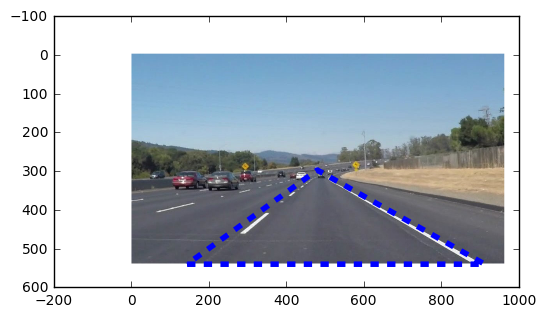

Processing 'solidWhiteRight.jpg'


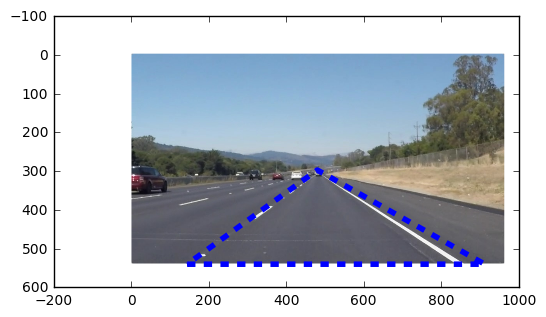

Processing 'solidYellowCurve.jpg'


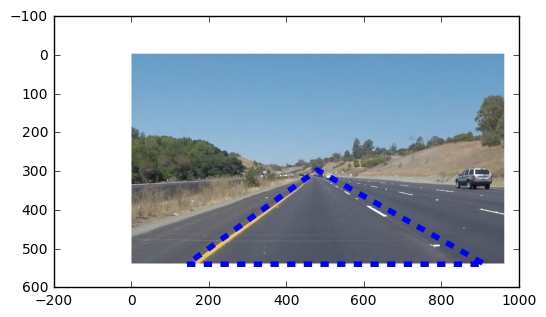

Processing 'solidYellowCurve2.jpg'


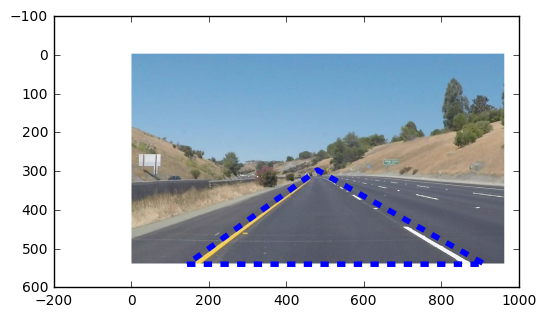

Processing 'solidYellowLeft.jpg'


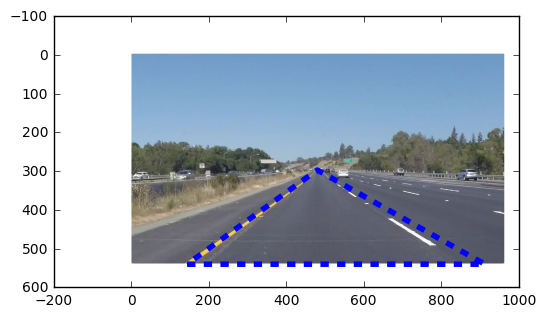

Processing 'whiteCarLaneSwitch.jpg'


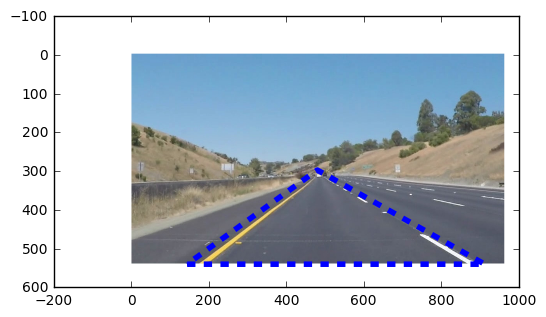

In [14]:
import os
for pic in os.listdir("test_images/")[1:]:
    print("Processing %r"%pic)
    path = (str(os.getcwd()+'/test_images/'+pic))
    image = mpimg.imread(path)
    
    # Read in the image and print out some stats
    
    # Grab the x and y size and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
    color_select = np.copy(image)
    line_image = np.copy(image)

    # Define the vertices of a triangular mask.
    # Keep in mind the origin (x=0, y=0) is in the upper left
    # MODIFY THESE VALUES TO ISOLATE THE REGION 
    # WHERE THE LANE LINES ARE IN THE IMAGE
    left_bottom = [.15*xsize, ysize]
    right_bottom = [.95*xsize, ysize]
    apex = [.5*xsize, .55*ysize]

    # Display the image and show region and color selections
    plt.imshow(image)
    x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
    plt.plot(x, y, 'b--', lw=4)
    plt.show()


Processing 'solidWhiteCurve.jpg'
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 521.01365445] , int(y2)  330.0
Saving 'solidWhiteCurvecopy.png'


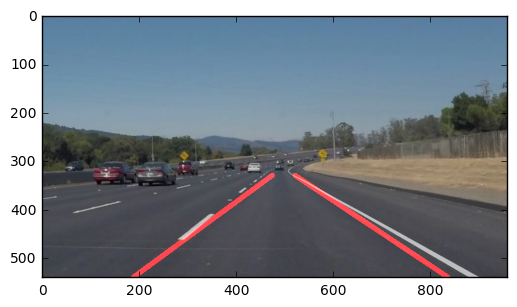

Processing 'solidWhiteRight.jpg'
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 519.66670639] , int(y2)  330.0
Saving 'solidWhiteRightcopy.png'


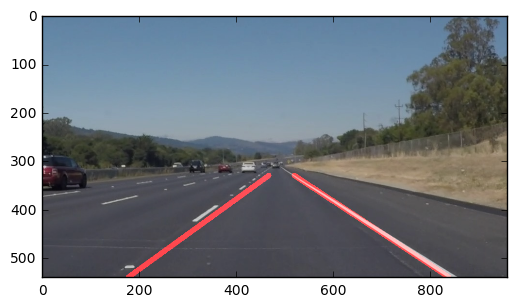

Processing 'solidYellowCurve.jpg'
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 512.82546806] , int(y2)  330.0
Saving 'solidYellowCurvecopy.png'


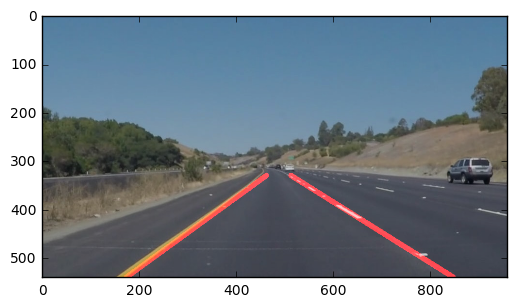

Processing 'solidYellowCurve2.jpg'
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 512.42600596] , int(y2)  330.0
Saving 'solidYellowCurve2copy.png'


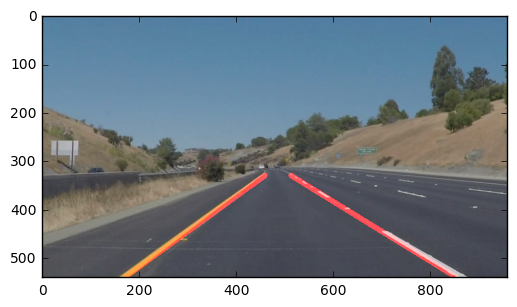

Processing 'solidYellowLeft.jpg'
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 510.92754649] , int(y2)  330.0
Saving 'solidYellowLeftcopy.png'


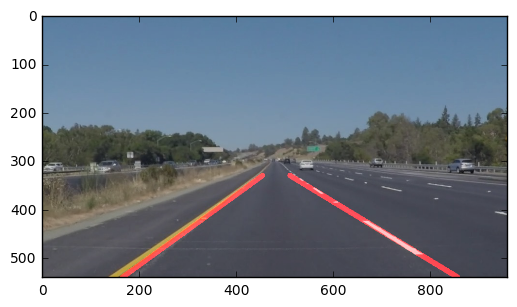

Processing 'whiteCarLaneSwitch.jpg'
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 512.15492894] , int(y2)  330.0
Saving 'whiteCarLaneSwitchcopy.png'


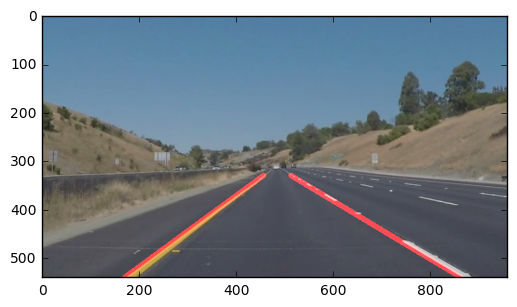

In [28]:
import os
for pic in os.listdir("test_images/")[1:]:
    print("Processing %r"%pic)
    tImage = process_image_frame(pic)
    # pic[:-4] - Removes the extension
    print ("Saving %r"% str(pic[:-4]+"copy.png"))
    mpimg.imsave(os.getcwd()+"/test_images/"+pic[:-4]+"copy.png", tImage)
    plt.imshow(tImage)
    plt.show()

run your solution on all test_images and make copies into the test_images directory).

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [18]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(imageName
            , kernelsize = 5
            , lowthresh = 50
            , highthresh=150
            , verts=[[(.15*image.shape[1],image.shape[0]),(.5*image.shape[1], .55*image.shape[0]) 
                      , (.5*image.shape[1], .55*image.shape[0]), (.95*image.shape[1],image.shape[0])]]
            , hough_rho=2, hough_theta = np.pi/180
            , hough_thresh = 22
            , hough_min_line_length = 18
            , hough_max_line_gap=1):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    image = imageName
    
    #Resize for optional video
    image = cv2.resize(image,(960, 540), interpolation = cv2.INTER_CUBIC)
    
    # Read in and grayscale the image

    gray = grayscale(image)
    # Blur the Image - Gaussianblur 
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = kernelsize
    blur_gray = gaussian_blur(gray,kernel_size)
    
    #Find the Edges - Canny edge detection
    low_thresh = lowthresh
    high_thresh = highthresh
    edges = canny(blur_gray, low_thresh, high_thresh)
    
    #Next we'll create a masked edges image using cv2.fillPoly() and find the region of interest  
    #Create region of interest using masked edges and polygon vertices
    imshape = image.shape
    
    yimg = imshape[0]
    ximg = imshape[1]
    vertices = np.array([verts], dtype=np.int32)

    masked_edges = region_of_interest(edges,vertices)
    
    #Define Hough transform parameters
    rho = hough_rho # distance resolution in pixels of the Hough grid
    theta = hough_theta # angular resolution in radians of the Hough grid
    threshold = hough_thresh    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = hough_min_line_length #minimum number of pixels making up a line
    max_line_gap = hough_max_line_gap    # maximum gap in pixels between connectable line segments

    #Run Hough on edge detected image
    #Output "lines" is an array containing endpoints of detected line segments
    line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

    #Now let's draw the lines on the edge image
    lines_edges = weighted_img(line_image,image)
    

    return lines_edges


Let's try the one with the solid white lane on the right first ...

In [30]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

right_x1  257 , int(y1)  540 ,int(right_x2)  [ 157.74462915] , int(y2)  330.0
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  3%|▎         | 7/222 [00:00<00:03, 64.43it/s]

right_x1  437 , int(y1)  540 ,int(right_x2)  [ 268.16586955] , int(y2)  330.0
right_x1  566 , int(y1)  540 ,int(right_x2)  [ 343.76464519] , int(y2)  330.0
right_x1  653 , int(y1)  540 ,int(right_x2)  [ 398.26047153] , int(y2)  330.0
right_x1  714 , int(y1)  540 ,int(right_x2)  [ 435.6559407] , int(y2)  330.0
right_x1  758 , int(y1)  540 ,int(right_x2)  [ 461.92058907] , int(y2)  330.0
right_x1  787 , int(y1)  540 ,int(right_x2)  [ 480.33633164] , int(y2)  330.0
right_x1  809 , int(y1)  540 ,int(right_x2)  [ 493.5523529] , int(y2)  330.0
right_x1  826 , int(y1)  540 ,int(right_x2)  [ 501.75528428] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 507.56776959] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 510.05555905] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 511.25152543] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 512.4284252] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 512.32564758] , int(

  7%|▋         | 16/222 [00:00<00:02, 70.29it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 513.86765456] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 516.35272276] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 518.83348244] , int(y2)  330.0


 10%|▉         | 22/222 [00:00<00:03, 65.67it/s]

right_x1  849 , int(y1)  540 ,int(right_x2)  [ 521.03773643] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 520.51885817] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 520.86950786] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 520.09784431] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 519.44595718] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 519.51016955] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 518.25954] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 519.1551891] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 519.79649251] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 519.83869373] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 519.42101085] , int(y2)  330.0


 14%|█▎        | 30/222 [00:00<00:02, 67.58it/s]

right_x1  845 , int(y1)  540 ,int(right_x2)  [ 518.87443275] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 519.06126052] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 519.2262818] , int(y2)  330.0


 17%|█▋        | 37/222 [00:00<00:02, 66.88it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 519.36296114] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 519.66169182] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 520.10165421] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 519.26353214] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 518.56589814] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 518.17278566] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 518.24112914] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 517.41664406] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 518.0763706] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 519.34196378] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 520.86583673] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 521.49789464] , int(y2)  330.0


 20%|██        | 45/222 [00:00<00:02, 68.31it/s]

right_x1  842 , int(y1)  540 ,int(right_x2)  [ 522.1344375] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 521.57202574] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 521.89960451] , int(y2)  330.0


 23%|██▎       | 52/222 [00:00<00:02, 63.72it/s]

right_x1  843 , int(y1)  540 ,int(right_x2)  [ 522.78088386] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 522.69016223] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 522.54313921] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 522.68946136] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 522.38841] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 522.45997083] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 522.57324717] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 522.62680993] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 521.18901852] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 520.39977624] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 518.74487799] , int(y2)  330.0


 29%|██▉       | 64/222 [00:01<00:02, 57.01it/s]

right_x1  844 , int(y1)  540 ,int(right_x2)  [ 517.61386619] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 516.27541374] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 516.10845497] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 515.36212051] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 515.23500275] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 515.42702781] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 515.07878795] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 515.08113983] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 515.04991974] , int(y2)  330.0
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 515.7406021] , int(y2)  330.0


 32%|███▏      | 70/222 [00:01<00:02, 51.67it/s]

right_x1  839 , int(y1)  540 ,int(right_x2)  [ 516.19640699] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 515.92972202] , int(y2)  330.0
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 515.62816816] , int(y2)  330.0
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 515.89996497] , int(y2)  330.0
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 516.82870485] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 517.60243251] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 517.04730585] , int(y2)  330.0


 34%|███▍      | 76/222 [00:01<00:02, 51.01it/s]

right_x1  834 , int(y1)  540 ,int(right_x2)  [ 516.44447199] , int(y2)  330.0
right_x1  834 , int(y1)  540 ,int(right_x2)  [ 517.03264506] , int(y2)  330.0
right_x1  833 , int(y1)  540 ,int(right_x2)  [ 515.34467674] , int(y2)  330.0


 37%|███▋      | 82/222 [00:01<00:03, 45.35it/s]

right_x1  832 , int(y1)  540 ,int(right_x2)  [ 515.311206] , int(y2)  330.0
right_x1  832 , int(y1)  540 ,int(right_x2)  [ 515.96556884] , int(y2)  330.0
right_x1  832 , int(y1)  540 ,int(right_x2)  [ 515.22820482] , int(y2)  330.0
right_x1  829 , int(y1)  540 ,int(right_x2)  [ 516.06670811] , int(y2)  330.0
right_x1  830 , int(y1)  540 ,int(right_x2)  [ 516.17962262] , int(y2)  330.0
right_x1  830 , int(y1)  540 ,int(right_x2)  [ 516.86080791] , int(y2)  330.0


 39%|███▉      | 87/222 [00:01<00:02, 45.40it/s]

right_x1  828 , int(y1)  540 ,int(right_x2)  [ 516.4431699] , int(y2)  330.0
right_x1  828 , int(y1)  540 ,int(right_x2)  [ 516.09220398] , int(y2)  330.0
right_x1  828 , int(y1)  540 ,int(right_x2)  [ 516.70189499] , int(y2)  330.0
right_x1  828 , int(y1)  540 ,int(right_x2)  [ 516.44727585] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 515.5560278] , int(y2)  330.0
right_x1  823 , int(y1)  540 ,int(right_x2)  [ 515.77321107] , int(y2)  330.0
right_x1  821 , int(y1)  540 ,int(right_x2)  [ 515.74852379] , int(y2)  330.0
right_x1  821 , int(y1)  540 ,int(right_x2)  [ 516.3091176] , int(y2)  330.0


 41%|████▏     | 92/222 [00:01<00:02, 44.20it/s]

right_x1  821 , int(y1)  540 ,int(right_x2)  [ 517.09731464] , int(y2)  330.0
right_x1  821 , int(y1)  540 ,int(right_x2)  [ 517.21371872] , int(y2)  330.0
right_x1  821 , int(y1)  540 ,int(right_x2)  [ 517.65800147] , int(y2)  330.0
right_x1  822 , int(y1)  540 ,int(right_x2)  [ 519.46143567] , int(y2)  330.0
right_x1  823 , int(y1)  540 ,int(right_x2)  [ 519.77380654] , int(y2)  330.0


 44%|████▎     | 97/222 [00:01<00:02, 43.47it/s]

right_x1  824 , int(y1)  540 ,int(right_x2)  [ 521.35443316] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 522.70352642] , int(y2)  330.0
right_x1  826 , int(y1)  540 ,int(right_x2)  [ 522.40781598] , int(y2)  330.0
right_x1  824 , int(y1)  540 ,int(right_x2)  [ 524.09696254] , int(y2)  330.0


 46%|████▌     | 102/222 [00:01<00:02, 42.81it/s]

right_x1  825 , int(y1)  540 ,int(right_x2)  [ 523.18050308] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 522.37936849] , int(y2)  330.0
right_x1  824 , int(y1)  540 ,int(right_x2)  [ 522.20159381] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 522.22191606] , int(y2)  330.0
right_x1  824 , int(y1)  540 ,int(right_x2)  [ 522.98288073] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 523.21413881] , int(y2)  330.0


 49%|████▊     | 108/222 [00:02<00:02, 43.82it/s]

right_x1  826 , int(y1)  540 ,int(right_x2)  [ 523.52652643] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 524.66150439] , int(y2)  330.0
right_x1  829 , int(y1)  540 ,int(right_x2)  [ 524.17245165] , int(y2)  330.0
right_x1  829 , int(y1)  540 ,int(right_x2)  [ 523.57095658] , int(y2)  330.0


 51%|█████     | 113/222 [00:02<00:02, 42.31it/s]

right_x1  831 , int(y1)  540 ,int(right_x2)  [ 522.98214675] , int(y2)  330.0
right_x1  833 , int(y1)  540 ,int(right_x2)  [ 522.76128053] , int(y2)  330.0
right_x1  833 , int(y1)  540 ,int(right_x2)  [ 521.9629265] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 522.29338118] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 522.81394337] , int(y2)  330.0


 53%|█████▎    | 118/222 [00:02<00:02, 41.77it/s]

right_x1  836 , int(y1)  540 ,int(right_x2)  [ 523.32480008] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 524.0620959] , int(y2)  330.0
right_x1  838 , int(y1)  540 ,int(right_x2)  [ 523.6117903] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  

 55%|█████▌    | 123/222 [00:02<00:02, 40.79it/s]

[ 523.40827677] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 522.08565189] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 521.68263081] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 520.54733173] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 520.58780911] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 520.80976647] , int(y2)  330.0


 58%|█████▊    | 128/222 [00:02<00:02, 43.05it/s]

right_x1  845 , int(y1)  540 ,int(right_x2)  [ 521.1085245] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 521.10328763] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 521.9799851] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 521.41944101] , int(y2)  330.0


 60%|██████    | 134/222 [00:02<00:01, 46.27it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 520.63802497] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 519.9120759] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 519.58740769] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 519.77955146] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 520.97772613] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 521.93496023] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 522.27564693] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 523.01302254] , int(y2)  330.0


 63%|██████▎   | 140/222 [00:02<00:01, 49.13it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 523.72143742] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 523.45316165] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 522.71575374] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 522.9108579] , int(y2)  330.0


 66%|██████▌   | 146/222 [00:02<00:01, 51.57it/s]

right_x1  854 , int(y1)  540 ,int(right_x2)  [ 521.27947228] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 520.25433262] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 520.16108338] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 520.1506366] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 521.22207728] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 522.40472314] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 523.63102479] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 524.1238027] , int(y2)  330.0


 68%|██████▊   | 152/222 [00:02<00:01, 52.71it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 524.69274787] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 524.76223932] , int(y2)  330.0
right_x1  859 , int(y1)  540 ,int(right_x2)  [ 524.18205047] , int(y2)  330.0
right_x1  859 , int(y1)  540 ,int(right_x2)  [ 524.34808685] , int(y2)  330.0


 71%|███████   | 158/222 [00:03<00:01, 52.31it/s]

right_x1  861 , int(y1)  540 ,int(right_x2)  [ 524.94378072] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 525.30830677] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 525.93884122] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 526.47414659] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 525.92152027] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 526.33585665] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 526.24243424] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 526.90859084] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 525.45309887] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 525.55813916] , int(y2)  330.0


 74%|███████▍  | 164/222 [00:03<00:01, 48.76it/s]

right_x1  874 , int(y1)  540 ,int(right_x2)  [ 526.09264196] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 524.75084468] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 524.14354399] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 522.34657588] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 521.34616255] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 521.22673106] , int(y2)  330.0


 76%|███████▌  | 169/222 [00:03<00:01, 45.61it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 521.05565925] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 520.955921] , int(y2)  330.0


 78%|███████▊  | 174/222 [00:03<00:01, 41.28it/s]

right_x1  871 , int(y1)  540 ,int(right_x2)  [ 521.03043019] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 521.02094255] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 520.96943061] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 521.85375666] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 521.50330063] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 521.562347] , int(y2)  330.0


 81%|████████  | 179/222 [00:03<00:01, 33.91it/s]

right_x1  876 , int(y1)  540 ,int(right_x2)  [ 521.39025622] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 521.8105612] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 522.79029556] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  

 82%|████████▏ | 183/222 [00:03<00:01, 31.94it/s]

[ 523.12990115] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 522.92477861] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 523.84389691] , int(y2)  330.0


 84%|████████▍ | 187/222 [00:03<00:01, 32.46it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 525.57907829] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 525.09816892] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 525.96970604] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 526.50965418] , int(y2)  330.0


 87%|████████▋ | 193/222 [00:04<00:00, 36.70it/s]

right_x1  880 , int(y1)  540 ,int(right_x2)  [ 526.44161999] , int(y2)  330.0
right_x1  882 , int(y1)  540 ,int(right_x2)  [ 527.2495491] , int(y2)  330.0
right_x1  888 , int(y1)  540 ,int(right_x2)  [ 528.41382093] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 529.8589781] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 529.18082554] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 527.66298433] , int(y2)  330.0


 90%|████████▉ | 199/222 [00:04<00:00, 40.37it/s]

right_x1  890 , int(y1)  540 ,int(right_x2)  [ 526.91863646] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 525.74984183] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 524.03093276] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 523.57888798] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 522.95230709] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 522.42014575] , int(y2)  330.0


 92%|█████████▏| 205/222 [00:04<00:00, 44.57it/s]

right_x1  884 , int(y1)  540 ,int(right_x2)  [ 522.13444285] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 522.25708366] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 522.99613812] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 523.12551856] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 524.29961914] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 525.32502616] , int(y2)  330.0


 95%|█████████▌| 211/222 [00:04<00:00, 47.04it/s]

right_x1  889 , int(y1)  540 ,int(right_x2)  [ 525.51925594] , int(y2)  330.0
right_x1  892 , int(y1)  540 ,int(right_x2)  [ 525.89475911] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 526.03550507] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 525.65974956] , int(y2)  330.0
right_x1  896 , int(y1)  540 ,int(right_x2)  [ 524.09577936] , int(y2)  330.0
right_x1  900 , int(y1)  540 ,int(right_x2)  [ 524.12230129] , int(y2)  330.0


 98%|█████████▊| 217/222 [00:04<00:00, 48.81it/s]

right_x1  900 , int(y1)  540 ,int(right_x2)  [ 522.81734439] , int(y2)  330.0
right_x1  900 , int(y1)  540 ,int(right_x2)  [ 521.44290978] , int(y2)  330.0
right_x1  898 , int(y1)  540 ,int(right_x2)  [ 521.52334896] , int(y2)  330.0
right_x1  897 , int(y1)  540 ,int(right_x2)  [ 520.9051295] , int(y2)  330.0
right_x1  893 , int(y1)  540 ,int(right_x2)  [ 519.37896758] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 518.77412799] , int(y2)  330.0


100%|█████████▉| 221/222 [00:04<00:00, 48.29it/s]


right_x1  889 , int(y1)  540 ,int(right_x2)  [ 518.92126611] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 518.96018885] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 519.65109283] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 520.43390392] , int(y2)  330.0
[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 3.03 s, sys: 757 ms, total: 3.78 s
Wall time: 5.12 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [31]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [32]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

right_x1  871 , int(y1)  540 ,int(right_x2)  [ 521.30484314] , int(y2)  330.0
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


  1%|          | 4/682 [00:00<00:18, 36.79it/s]

right_x1  860 , int(y1)  540 ,int(right_x2)  [ 521.9145006] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 524.74568368] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 525.0423289] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 524.62713946] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 524.47121085] , int(y2)  330.0
right_x1  832 , int(y1)  540 ,int(right_x2)  [ 524.3298476] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 521.22870885] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.94856483] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 517.31798792] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 517.53050943] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 515.89680744] , int(y2)  330.0


  2%|▏         | 14/682 [00:00<00:14, 44.93it/s]

right_x1  853 , int(y1)  540 ,int(right_x2)  [ 519.55458317] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 514.03594997] , int(y2)  330.0


  3%|▎         | 22/682 [00:00<00:12, 51.61it/s]

right_x1  854 , int(y1)  540 ,int(right_x2)  [ 517.75885162] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 518.75704765] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 519.18005352] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 519.34071636] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 516.34239646] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 517.79029264] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 516.96243561] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 521.78254243] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 520.1211006] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 520.58341611] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 521.40128213] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 517.09701245] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 519.91037738] , in

  4%|▍         | 30/682 [00:00<00:11, 57.39it/s]

right_x1  865 , int(y1)  540 ,int(right_x2)  [ 522.05500842] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 523.29732001] , int(y2)  330.0


  5%|▌         | 36/682 [00:00<00:11, 57.91it/s]

right_x1  868 , int(y1)  540 ,int(right_x2)  [ 525.52917664] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 524.79566783] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 526.53896748] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 526.56102723] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 526.9821523] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 528.83311131] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 529.08329133] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 530.69781987] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 530.8654921] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 531.0003438] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 530.02049079] , int(y2)  330.0


  6%|▋         | 43/682 [00:00<00:10, 60.50it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 529.09049156] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 529.79839944] , int(y2)  330.0


  7%|▋         | 50/682 [00:00<00:11, 56.39it/s]

right_x1  884 , int(y1)  540 ,int(right_x2)  [ 526.87130859] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 526.14809835] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 525.36407376] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 524.22070306] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 523.19603672] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 523.4465679] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 521.13288093] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 521.13385116] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 522.64684165] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 521.14474321] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 521.74045425] , int(y2)  330.0


  9%|▉         | 62/682 [00:00<00:11, 54.32it/s]

right_x1  870 , int(y1)  540 ,int(right_x2)  [ 521.59181384] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 520.93936194] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 520.66021318] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 518.42881589] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 520.29827227] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 520.07689803] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 516.75061663] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 515.80429917] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 514.73844596] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 518.21043608] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 520.13292508] , int(y2)  330.0


 10%|▉         | 68/682 [00:01<00:12, 51.09it/s]

right_x1  862 , int(y1)  540 ,int(right_x2)  [ 520.89935584] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 513.17434575] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 517.0999229] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 518.00603487] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 517.77514102] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 519.11815509] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 518.38653537] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 516.98080261] , int(y2)  330.0


 11%|█         | 74/682 [00:01<00:12, 49.68it/s]

right_x1  852 , int(y1)  540 ,int(right_x2)  [ 519.07144454] , int(y2)  330.0


 12%|█▏        | 80/682 [00:01<00:13, 46.04it/s]

right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.17431887] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 515.57905223] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 513.14724577] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 513.48447888] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 514.50855836] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.11133656] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 519.46705218] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 518.64327749] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 516.89958717] , int(y2)  330.0


 12%|█▏        | 85/682 [00:01<00:13, 43.14it/s]

right_x1  851 , int(y1)  540 ,int(right_x2)  [ 517.98822689] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 518.51947647] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 520.55411301] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 517.58795424] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 516.0378332] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 514.66260964] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 513.213776] , int(y2)  330.0


 13%|█▎        | 90/682 [00:01<00:13, 42.89it/s]

right_x1  850 , int(y1)  540 ,int(right_x2)  [ 513.22132469] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 515.06416908] , int(y2)  330.0


 14%|█▍        | 96/682 [00:01<00:13, 44.32it/s]

right_x1  847 , int(y1)  540 ,int(right_x2)  [ 514.58764881] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 512.82328734] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 513.06947023] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 511.10789197] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 509.49574193] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 511.58962539] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 508.7095863] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 505.16729795] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 506.33176649] , int(y2)  330.0


 15%|█▍        | 102/682 [00:01<00:12, 46.14it/s]

right_x1  851 , int(y1)  540 ,int(right_x2)  [ 511.63642392] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 513.22610508] , int(y2)  330.0


 16%|█▌        | 108/682 [00:02<00:11, 48.86it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 512.04398875] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 513.89965169] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 515.77327081] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 515.95149365] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 515.09296703] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 513.26387452] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 513.97267285] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 513.74122135] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 516.17407844] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 517.51382769] , int(y2)  330.0


 17%|█▋        | 114/682 [00:02<00:10, 51.71it/s]

right_x1  844 , int(y1)  540 ,int(right_x2)  [ 519.13796594] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 518.9017123] , int(y2)  330.0


 18%|█▊        | 120/682 [00:02<00:10, 51.75it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 520.10755761] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 520.50022188] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 520.09923083] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 520.57315323] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 521.1407205] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 514.47236327] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.44944009] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.9347096] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 517.99844796] , int(y2)  330.0


 18%|█▊        | 126/682 [00:02<00:10, 52.28it/s]

right_x1  850 , int(y1)  540 ,int(right_x2)  [ 519.02407389] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 519.61946203] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 518.98578626] , int(y2)  330.0


 19%|█▉        | 132/682 [00:02<00:10, 52.54it/s]

right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.59705222] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 516.78500825] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 516.40650019] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 515.63481471] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 516.7881416] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 515.49874507] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 515.77096775] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 515.9136723] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 516.88539091] , int(y2)  330.0


 20%|██        | 138/682 [00:02<00:10, 53.16it/s]

right_x1  850 , int(y1)  540 ,int(right_x2)  [ 516.12284693] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 516.0757678] , int(y2)  330.0


 21%|██        | 144/682 [00:02<00:09, 54.19it/s]

right_x1  851 , int(y1)  540 ,int(right_x2)  [ 514.99524413] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 515.21531117] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 515.43210135] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 512.72538072] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 512.70731108] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 512.611754] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 511.15228278] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 510.17556347] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 508.53344964] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 507.89457407] , int(y2)  330.0


 22%|██▏       | 151/682 [00:02<00:09, 56.05it/s]

right_x1  865 , int(y1)  540 ,int(right_x2)  [ 507.52785721] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 507.97666148] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 505.55918618] , int(y2)  330.0


 23%|██▎       | 157/682 [00:02<00:09, 55.00it/s]

right_x1  862 , int(y1)  540 ,int(right_x2)  [ 508.06308121] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 512.11725599] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 512.6772911] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 511.29735848] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 512.00566974] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 511.38770375] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 508.50730945] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 510.63011662] , int(y2)  330.0
right_x1  859 , int(y1)  540 ,int(right_x2)  [ 509.14386815] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 507.51693682] , int(y2)  330.0


 24%|██▍       | 163/682 [00:03<00:10, 50.31it/s]

right_x1  865 , int(y1)  540 ,int(right_x2)  [ 507.60097859] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 508.0746697] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 508.6019064] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 508.566685] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 510.05203958] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 505.10744314] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 507.81347641] , int(y2)  330.0


 25%|██▍       | 169/682 [00:03<00:10, 49.42it/s]

right_x1  882 , int(y1)  540 ,int(right_x2)  [ 506.53917568] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 508.39129555] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 509.62917911] , int(y2)  330.0


 26%|██▌       | 175/682 [00:03<00:10, 47.90it/s]

right_x1  883 , int(y1)  540 ,int(right_x2)  [ 510.66360613] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 514.27616813] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 514.52525429] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 516.18976875] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 519.76997768] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 520.25461494] , int(y2)  330.0


 26%|██▋       | 180/682 [00:03<00:11, 45.54it/s]

right_x1  880 , int(y1)  540 ,int(right_x2)  [ 519.14775471] , int(y2)  330.0
right_x1  882 , int(y1)  540 ,int(right_x2)  [ 518.43895757] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 516.76098454] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 516.09047111] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 513.42642126] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 513.09185645] , int(y2)  330.0


 27%|██▋       | 185/682 [00:03<00:13, 37.81it/s]

right_x1  895 , int(y1)  540 ,int(right_x2)  [ 512.4439663] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 511.71359504] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 510.08981197] , int(y2)  330.0


 28%|██▊       | 190/682 [00:03<00:13, 37.44it/s]

right_x1  894 , int(y1)  540 ,int(right_x2)  [ 508.20453612] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 512.40664158] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 512.95726928] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 510.22008348] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 510.1334573] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 509.13007208] , int(y2)  330.0


 29%|██▊       | 195/682 [00:03<00:12, 39.56it/s]

right_x1  888 , int(y1)  540 ,int(right_x2)  [ 508.61528773] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 506.98702112] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 507.9382832] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 507.02902938] , int(y2)  330.0


 29%|██▉       | 200/682 [00:03<00:11, 40.86it/s]

right_x1  882 , int(y1)  540 ,int(right_x2)  [ 509.92099863] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 509.04079712] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 506.49042601] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 504.90032316] , int(y2)  330.0
right_x1  882 , int(y1)  540 ,int(right_x2)  [ 506.69867912] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 508.37572951] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 509.12970308] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 509.02397754] , int(y2)  330.0


 30%|███       | 205/682 [00:04<00:12, 39.38it/s]

right_x1  876 , int(y1)  540 ,int(right_x2)  [ 508.24416666] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 509.45792653] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 504.99423278] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 503.67608025] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 504.48192284] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 505.54145089] , int(y2)  330.0


 31%|███       | 210/682 [00:04<00:11, 40.79it/s]

right_x1  873 , int(y1)  540 ,int(right_x2)  [ 504.77198019] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 502.08091744] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 502.85930085] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 501.19839599] , int(y2)  330.0


 32%|███▏      | 215/682 [00:04<00:11, 42.28it/s]

right_x1  871 , int(y1)  540 ,int(right_x2)  [ 503.35618188] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 504.60316619] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 503.41428743] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 503.74078527] , int(y2)  330.0


 32%|███▏      | 220/682 [00:04<00:12, 36.49it/s]

right_x1  871 , int(y1)  540 ,int(right_x2)  [ 502.95870717] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 500.41206435] , int(y2)  330.0


 33%|███▎      | 225/682 [00:04<00:12, 37.27it/s]

right_x1  874 , int(y1)  540 ,int(right_x2)  [ 501.42505473] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 499.96029275] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 504.34668134] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 502.69146313] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 502.18179659] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 501.62058932] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 503.72684906] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 506.23856825] , int(y2)  330.0


 34%|███▍      | 234/682 [00:04<00:11, 40.55it/s]

right_x1  865 , int(y1)  540 ,int(right_x2)  [ 506.99494223] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 508.99160425] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 509.33360099] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 510.66685402] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 510.18647589] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 510.77469056] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 513.26158099] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 512.79490403] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 512.37680882] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 515.03662056] , int(y2)  330.0


 36%|███▌      | 244/682 [00:05<00:09, 44.16it/s]

right_x1  861 , int(y1)  540 ,int(right_x2)  [ 514.24775537] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 515.41263299] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 515.0915703] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 514.64127992] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 514.48804851] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 512.35413395] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 509.17721988] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 504.49830303] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 503.66524499] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 504.35318873] , int(y2)  330.0


 37%|███▋      | 255/682 [00:05<00:09, 46.86it/s]

right_x1  878 , int(y1)  540 ,int(right_x2)  [ 502.00081006] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 497.17802844] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 498.6709195] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 496.71202139] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 500.74487494] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 502.71748928] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 504.337402] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 505.14480162] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 504.58885376] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 503.68933331] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 501.73116875] , int(y2)  330.0


 39%|███▉      | 267/682 [00:05<00:08, 49.73it/s]

right_x1  872 , int(y1)  540 ,int(right_x2)  [ 503.14746169] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 501.38239733] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 502.78077663] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 499.39783219] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 497.23023039] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 501.05539776] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 503.90316471] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 506.93804351] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 508.26186209] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 509.86780919] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 508.42710887] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 505.4220152] , int(y2)  330.0


 41%|████      | 278/682 [00:05<00:08, 46.51it/s]

right_x1  887 , int(y1)  540 ,int(right_x2)  [ 505.05610322] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 505.43737111] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 505.99142085] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 506.48987406] , int(y2)  330.0
right_x1  888 , int(y1)  540 ,int(right_x2)  [ 504.25659374] , int(y2)  330.0
right_x1  888 , int(y1)  540 ,int(right_x2)  [ 501.14895268] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 500.45364679] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 502.09064126] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 504.78787418] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 505.13681156] , int(y2)  330.0


 43%|████▎     | 290/682 [00:05<00:07, 51.28it/s]

right_x1  874 , int(y1)  540 ,int(right_x2)  [ 504.89352928] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 501.83818058] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 500.88196733] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 501.04349178] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 502.56318716] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 509.22520845] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 503.27765954] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 502.69838041] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 501.47244766] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 500.8351523] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 501.79370932] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 500.55403148] , int(y2)  330.0


 43%|████▎     | 296/682 [00:06<00:07, 52.06it/s]

right_x1  860 , int(y1)  540 ,int(right_x2)  [ 500.33178782] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 498.6318207] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 498.75256555] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 501.62869462] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 505.89761354] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 497.78142293] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 499.13522388] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 491.62730389] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 488.81117518] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 495.53410923] , int(y2)  330.0


 45%|████▍     | 304/682 [00:06<00:06, 56.46it/s]

right_x1  860 , int(y1)  540 ,int(right_x2)  [ 498.37031871] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 503.31727057] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 506.34136653] , int(y2)  330.0


 45%|████▌     | 310/682 [00:06<00:06, 54.16it/s]

right_x1  860 , int(y1)  540 ,int(right_x2)  [ 506.83255088] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 507.04186035] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 504.5611415] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 507.38126059] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 508.72114] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 510.6727143] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 509.441867] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 513.57415965] , int(y2)  330.0


 46%|████▋     | 316/682 [00:06<00:06, 55.67it/s]

right_x1  858 , int(y1)  540 ,int(right_x2)  [ 515.04310056] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 512.67524282] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 511.43236868] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 510.92395894] , int(y2)  330.0


 47%|████▋     | 322/682 [00:06<00:06, 55.47it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 510.84859973] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 506.88221283] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 505.91406765] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 504.61044857] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 503.71326233] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 501.47716628] , int(y2)  330.0
right_x1  882 , int(y1)  540 ,int(right_x2)  [ 496.7929223] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 501.27147946] , int(y2)  330.0


 48%|████▊     | 328/682 [00:06<00:06, 55.28it/s]

right_x1  869 , int(y1)  540 ,int(right_x2)  [ 502.91725502] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 504.08485537] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 504.39486983] , int(y2)  330.0


 49%|████▉     | 334/682 [00:06<00:06, 55.64it/s]

right_x1  862 , int(y1)  540 ,int(right_x2)  [ 504.35132498] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 505.14345582] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 506.08325188] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 504.34740599] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 505.04179101] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 504.71574603] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 504.86440641] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 503.99460023] , int(y2)  330.0
right_x1  866 , int(y1)  540 ,int(right_x2)  [ 499.15191517] , int(y2)  330.0


 50%|████▉     | 340/682 [00:06<00:06, 56.56it/s]

right_x1  861 , int(y1)  540 ,int(right_x2)  [ 501.65518272] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 502.68385105] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 503.39720097] , int(y2)  330.0


 51%|█████     | 346/682 [00:06<00:05, 56.04it/s]

right_x1  855 , int(y1)  540 ,int(right_x2)  [ 504.79110905] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 506.34324966] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 503.66856424] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 504.88115286] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 503.62190644] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 505.72046775] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 503.78810439] , int(y2)  330.0
right_x1  859 , int(y1)  540 ,int(right_x2)  [ 504.69554688] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 507.16876296] , int(y2)  330.0


 52%|█████▏    | 352/682 [00:07<00:05, 55.26it/s]

right_x1  856 , int(y1)  540 ,int(right_x2)  [ 505.97920195] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 507.26268395] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 506.96509664] , int(y2)  330.0


 53%|█████▎    | 359/682 [00:07<00:05, 56.56it/s]

right_x1  852 , int(y1)  540 ,int(right_x2)  [ 508.04012762] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 506.6623654] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 502.07508435] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 503.9058058] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 499.51378165] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 501.28180832] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 503.76926259] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 504.80813643] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 502.93541535] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 498.24373618] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 500.43066029] , int(y2)  330.0


 54%|█████▍    | 371/682 [00:07<00:06, 50.49it/s]

right_x1  858 , int(y1)  540 ,int(right_x2)  [ 500.49305774] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 501.92419545] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 501.39117801] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 501.33051752] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 502.50380392] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 495.84599234] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 501.96921952] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 502.65524325] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 504.72426433] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 499.50648079] , int(y2)  330.0


 55%|█████▌    | 377/682 [00:07<00:06, 48.47it/s]

right_x1  859 , int(y1)  540 ,int(right_x2)  [ 493.0754367] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 498.58463554] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 500.37996999] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 502.45480229] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 503.81272905] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 502.36641471] , int(y2)  330.0


 56%|█████▌    | 382/682 [00:07<00:06, 45.65it/s]

right_x1  864 , int(y1)  540 ,int(right_x2)  [ 499.87976251] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 500.17467393] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 502.81909154] , int(y2)  330.0


 57%|█████▋    | 387/682 [00:07<00:06, 44.95it/s]

right_x1  859 , int(y1)  540 ,int(right_x2)  [ 500.85528635] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 499.23204157] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 498.74821042] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 498.80786561] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 501.33332696] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 500.05515305] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 501.66164565] , int(y2)  330.0


 57%|█████▋    | 392/682 [00:07<00:06, 45.63it/s]

right_x1  850 , int(y1)  540 ,int(right_x2)  [ 502.14863383] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 503.03517576] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 504.1199527] , int(y2)  330.0


 58%|█████▊    | 398/682 [00:08<00:06, 47.06it/s]

right_x1  842 , int(y1)  540 ,int(right_x2)  [ 505.12972551] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 506.01255525] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 508.2089281] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 508.3510657] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 508.2542361] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 503.27583102] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 502.91015725] , int(y2)  330.0


 59%|█████▉    | 403/682 [00:08<00:05, 46.87it/s]

right_x1  839 , int(y1)  540 ,int(right_x2)  [ 505.76146672] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 506.0161052] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 506.28491151] , int(y2)  330.0


 60%|█████▉    | 408/682 [00:08<00:05, 46.82it/s]

right_x1  832 , int(y1)  540 ,int(right_x2)  [ 507.63676685] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 505.04573679] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 504.52430431] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 502.78400779] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 505.88892331] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 506.01319594] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 505.24727455] , int(y2)  330.0


 61%|██████    | 413/682 [00:08<00:05, 46.63it/s]

right_x1  840 , int(y1)  540 ,int(right_x2)  [ 505.81747248] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 503.91435753] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 506.54630965] , int(y2)  330.0


 61%|██████▏   | 418/682 [00:08<00:05, 46.84it/s]

right_x1  840 , int(y1)  540 ,int(right_x2)  [ 507.87033643] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 508.70330275] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 463.93972468] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 475.88520172] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 484.891497] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 491.04557588] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 494.09317072] , int(y2)  330.0


 62%|██████▏   | 423/682 [00:08<00:05, 47.42it/s]

right_x1  855 , int(y1)  540 ,int(right_x2)  [ 496.7437085] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 497.74182826] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 493.30733264] , int(y2)  330.0


 63%|██████▎   | 429/682 [00:08<00:05, 48.13it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 498.15887642] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 501.64862637] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 505.02012374] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 506.5433563] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 509.02202652] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 504.35764964] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 506.07378895] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 505.72620145] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 510.37524853] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 511.00070524] , int(y2)  330.0


 65%|██████▍   | 440/682 [00:08<00:04, 49.25it/s]

right_x1  844 , int(y1)  540 ,int(right_x2)  [ 511.51316776] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 510.40260725] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 515.77502719] , int(y2)  330.0
right_x1  842 , int(y1)  540 ,int(right_x2)  [ 513.65638331] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 513.97279193] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 515.07118754] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 513.80941337] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 510.18633458] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 508.87167132] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 508.22342641] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 507.49549415] , int(y2)  330.0


 66%|██████▋   | 452/682 [00:09<00:04, 53.00it/s]

right_x1  869 , int(y1)  540 ,int(right_x2)  [ 503.19406272] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 503.64905547] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 502.17025914] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 499.83443402] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 500.03583242] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 503.66759556] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 505.57461459] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 504.87297652] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 507.30416023] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 509.25089172] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 509.83495257] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 510.29970937] , int(y2)  330.0


 68%|██████▊   | 465/682 [00:09<00:03, 57.06it/s]

right_x1  864 , int(y1)  540 ,int(right_x2)  [ 508.64134719] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 507.34251551] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 506.53394212] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 508.94064889] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 509.93832732] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 508.19122914] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 511.62115052] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 512.14031625] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 511.66611374] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 512.11769204] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 509.76876696] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 509.17728495] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 508.86239333] , i

 70%|███████   | 480/682 [00:09<00:03, 61.57it/s]

right_x1  864 , int(y1)  540 ,int(right_x2)  [ 506.65144021] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 504.16559743] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 507.32713858] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 508.60013584] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 504.35066269] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 506.9073296] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 507.34762569] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 507.04078777] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 506.60757205] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 504.41905043] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 503.0797447] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 500.30369071] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 502.09391558] , int

 72%|███████▏  | 494/682 [00:09<00:03, 60.33it/s]

right_x1  851 , int(y1)  540 ,int(right_x2)  [ 505.33560754] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 507.83355394] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 504.45241637] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 502.95536957] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 506.22625192] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 508.34403276] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 507.25364039] , int(y2)  330.0
right_x1  841 , int(y1)  540 ,int(right_x2)  [ 508.85118598] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 508.91926287] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 508.88798318] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 510.01110561] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 509.31227463] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 504.74949475] , i

 73%|███████▎  | 501/682 [00:09<00:03, 56.74it/s]

right_x1  859 , int(y1)  540 ,int(right_x2)  [ 506.66382785] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 509.0755888] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 511.81647226] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 513.14931848] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 513.68037359] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 513.36209038] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 513.69675272] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 511.67296816] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 509.69355889] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 508.70087584] , int(y2)  330.0
right_x1  863 , int(y1)  540 ,int(right_x2)  [ 510.11793891] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 509.4173722] , int(y2)  330.0


 75%|███████▌  | 514/682 [00:10<00:02, 57.04it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 509.06964724] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 508.25081686] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 508.79093481] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 507.46148012] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 507.37237415] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 506.63802532] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 506.92414553] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 507.07174888] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 508.65622818] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 506.62986534] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 504.50509054] , int(y2)  330.0


 77%|███████▋  | 526/682 [00:10<00:03, 51.99it/s]

right_x1  851 , int(y1)  540 ,int(right_x2)  [ 505.22072314] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 507.56268511] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 507.83667592] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 508.36613798] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 509.82616021] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 510.71917634] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 510.10048232] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 510.741159] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 509.4355146] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 511.54757894] , int(y2)  330.0


 79%|███████▉  | 538/682 [00:10<00:02, 51.43it/s]

right_x1  852 , int(y1)  540 ,int(right_x2)  [ 509.42140227] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 509.92269715] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 510.53620541] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 511.90726151] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 510.21524681] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 510.98199359] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 512.66867125] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 512.54228099] , int(y2)  330.0
right_x1  850 , int(y1)  540 ,int(right_x2)  [ 513.8813902] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 514.46853581] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 515.62586662] , int(y2)  330.0


 80%|███████▉  | 544/682 [00:10<00:02, 46.67it/s]

right_x1  849 , int(y1)  540 ,int(right_x2)  [ 513.71790959] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 511.8274001] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 514.2422533] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 510.32926426] , int(y2)  330.0
right_x1  854 , int(y1)  540 ,int(right_x2)  [ 512.78479871] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 514.806079] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 516.05594213] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 517.35635214] , int(y2)  330.0


 81%|████████  | 554/682 [00:11<00:03, 41.86it/s]

right_x1  853 , int(y1)  540 ,int(right_x2)  [ 518.60334667] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 519.42074585] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 520.29697513] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 521.25400549] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 519.81397254] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 516.50349321] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 514.90360077] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 516.15247355] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 517.27086137] , int(y2)  330.0


 82%|████████▏ | 559/682 [00:11<00:02, 42.15it/s]

right_x1  858 , int(y1)  540 ,int(right_x2)  [ 517.83439944] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 518.98018581] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 518.07947265] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 519.13959537] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 519.73419601] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 519.53816578] , int(y2)  330.0


 83%|████████▎ | 564/682 [00:11<00:02, 41.97it/s]

right_x1  863 , int(y1)  540 ,int(right_x2)  [ 520.16228692] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 521.54346704] , int(y2)  330.0
right_x1  861 , int(y1)  540 ,int(right_x2)  [ 521.32820392] , int(y2)  330.0


 83%|████████▎ | 569/682 [00:11<00:02, 42.37it/s]

right_x1  864 , int(y1)  540 ,int(right_x2)  [ 520.74740599] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 518.04798677] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 519.20389734] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 517.86142271] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 518.9581486] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 519.97261809] , int(y2)  330.0


 84%|████████▍ | 574/682 [00:11<00:02, 42.34it/s]

right_x1  873 , int(y1)  540 ,int(right_x2)  [ 520.44578932] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 520.96424847] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 520.32224174] , int(y2)  330.0


 85%|████████▍ | 579/682 [00:11<00:02, 41.95it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 520.59258943] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 521.69879286] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 520.95091043] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 521.88613312] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 519.22062732] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 521.04700343] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 521.28548028] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 521.71494817] , int(y2)  330.0


 86%|████████▌ | 584/682 [00:11<00:02, 39.33it/s]

right_x1  885 , int(y1)  540 ,int(right_x2)  [ 520.28737403] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 519.92032984] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 520.74009138] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 519.72395451] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 519.75846345] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 518.53902189] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 515.42237461] , int(y2)  330.0


 87%|████████▋ | 590/682 [00:11<00:02, 42.21it/s]

right_x1  889 , int(y1)  540 ,int(right_x2)  [ 514.91996166] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 511.420735] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 510.81496732] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 509.18532043] , int(y2)  330.0


 87%|████████▋ | 596/682 [00:12<00:01, 44.21it/s]

right_x1  886 , int(y1)  540 ,int(right_x2)  [ 503.6897717] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 505.60053817] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 505.89551867] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 508.97502106] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 510.79658751] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 511.59277085] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 512.33248033] , int(y2)  330.0


 88%|████████▊ | 602/682 [00:12<00:01, 47.80it/s]

right_x1  876 , int(y1)  540 ,int(right_x2)  [ 515.1433063] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 515.64517559] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 516.51451011] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 514.49591346] , int(y2)  330.0
right_x1  886 , int(y1)  540 ,int(right_x2)  [ 513.32881937] , int(y2)  330.0


 89%|████████▉ | 608/682 [00:12<00:01, 50.04it/s]

right_x1  883 , int(y1)  540 ,int(right_x2)  [ 514.72026858] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 515.38705656] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 511.80746009] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 511.04704733] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 513.49222202] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 513.75492276] , int(y2)  330.0


 90%|█████████ | 614/682 [00:12<00:01, 50.35it/s]

right_x1  885 , int(y1)  540 ,int(right_x2)  [ 514.13225204] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 514.21817773] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 513.06132441] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 512.48590229] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 512.70808797] , int(y2)  330.0


 91%|█████████ | 620/682 [00:12<00:01, 50.79it/s]

right_x1  885 , int(y1)  540 ,int(right_x2)  [ 514.66357262] , int(y2)  330.0
right_x1  889 , int(y1)  540 ,int(right_x2)  [ 511.09720051] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 510.84295892] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 509.7345588] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 510.5500401] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 514.95992258] , int(y2)  330.0


 92%|█████████▏| 626/682 [00:12<00:01, 48.79it/s]

right_x1  893 , int(y1)  540 ,int(right_x2)  [ 516.68022452] , int(y2)  330.0
right_x1  895 , int(y1)  540 ,int(right_x2)  [ 518.07867231] , int(y2)  330.0
right_x1  896 , int(y1)  540 ,int(right_x2)  [ 518.07436746] , int(y2)  330.0
right_x1  892 , int(y1)  540 ,int(right_x2)  [ 519.29564263] , int(y2)  330.0


 93%|█████████▎| 631/682 [00:12<00:01, 47.06it/s]

right_x1  899 , int(y1)  540 ,int(right_x2)  [ 516.17209954] , int(y2)  330.0
right_x1  904 , int(y1)  540 ,int(right_x2)  [ 512.60242897] , int(y2)  330.0
right_x1  905 , int(y1)  540 ,int(right_x2)  [ 510.11235449] , int(y2)  330.0
right_x1  902 , int(y1)  540 ,int(right_x2)  [ 508.9998331] , int(y2)  330.0
right_x1  901 , int(y1)  540 ,int(right_x2)  [ 508.44216505] , int(y2)  330.0
right_x1  895 , int(y1)  540 ,int(right_x2)  [ 510.85175965] , int(y2)  330.0


 93%|█████████▎| 636/682 [00:12<00:01, 45.21it/s]

right_x1  898 , int(y1)  540 ,int(right_x2)  [ 507.56180298] , int(y2)  330.0
right_x1  896 , int(y1)  540 ,int(right_x2)  [ 510.76195259] , int(y2)  330.0
right_x1  893 , int(y1)  540 ,int(right_x2)  [ 511.9944866] , int(y2)  330.0


 94%|█████████▍| 641/682 [00:12<00:00, 44.49it/s]

right_x1  892 , int(y1)  540 ,int(right_x2)  [ 514.38540827] , int(y2)  330.0
right_x1  893 , int(y1)  540 ,int(right_x2)  [ 512.87123404] , int(y2)  330.0
right_x1  891 , int(y1)  540 ,int(right_x2)  [ 512.74287282] , int(y2)  330.0
right_x1  888 , int(y1)  540 ,int(right_x2)  [ 512.60129923] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 509.05489004] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 511.52856566] , int(y2)  330.0
right_x1  895 , int(y1)  540 ,int(right_x2)  [ 507.49925963] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 508.8420038] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 507.50423327] , int(y2)  330.0


 95%|█████████▍| 646/682 [00:13<00:00, 42.88it/s]

right_x1  888 , int(y1)  540 ,int(right_x2)  [ 505.1114612] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 508.00479669] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 509.22989454] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 508.3196312] , int(y2)  330.0


 95%|█████████▌| 651/682 [00:13<00:00, 41.08it/s]

right_x1  877 , int(y1)  540 ,int(right_x2)  [ 509.33347046] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 509.92452364] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 508.40878702] , int(y2)  330.0


 96%|█████████▌| 656/682 [00:13<00:00, 38.03it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 510.68622783] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 510.74360059] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 510.37285548] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 509.49347811] , int(y2)  330.0


 97%|█████████▋| 661/682 [00:13<00:00, 39.63it/s]

right_x1  875 , int(y1)  540 ,int(right_x2)  [ 509.98249705] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 508.12176437] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 503.77191173] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 507.9768763] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 509.98554026] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 510.49924033] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 506.9903496] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 510.97823285] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 511.40674255] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 512.58669347] , int(y2)  330.0


 98%|█████████▊| 671/682 [00:13<00:00, 42.90it/s]

right_x1  873 , int(y1)  540 ,int(right_x2)  [ 514.05610255] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 513.92793012] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 513.92121656] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 511.18544771] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 508.33262154] , int(y2)  330.0


 99%|█████████▉| 677/682 [00:13<00:00, 45.34it/s]

right_x1  874 , int(y1)  540 ,int(right_x2)  [ 511.91013338] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 515.87716069] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 515.59568355] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 514.92588119] , int(y2)  330.0
right_x1  867 , int(y1)  540 ,int(right_x2)  [ 514.50621939] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 511.4929186] , int(y2)  330.0


100%|█████████▉| 681/682 [00:13<00:00, 48.94it/s]


right_x1  884 , int(y1)  540 ,int(right_x2)  [ 506.61344077] , int(y2)  330.0
right_x1  880 , int(y1)  540 ,int(right_x2)  [ 507.24940854] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 506.03837242] , int(y2)  330.0
right_x1  878 , int(y1)  540 ,int(right_x2)  [ 506.7532122] , int(y2)  330.0
[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 9.57 s, sys: 2.09 s, total: 11.7 s
Wall time: 14.5 s


In [33]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!

#### Pipeline
1. Load Image
2. Convert to Grayscale 
3. Blur the image using Gaussian Smoothing Technique 
4. Apply Canny Edge Detection 
5. Create region of interest / mask 
6. Apply Hough Transforms to find potential lines in our mask 
7. Filter the Hough lines by slope and endpoint locations, separate the lines into left and right lanes, run linear regressions on them, and finally extrapolate our lane lines

#### How could you imagine making your algorithm better / more robust?
I believe if I spent more time tweaking and optimizing the parameters in my image transformation steps (Hough and Canny), I could have produced a more robust algorithm.  While it looks fine in the two test mp4s, it does not perform as well in the optional challenge mp4.

I tried incorporating global variables and a gradient type of method where the previous steps values would be compared, however it's still volatile in the video.  Also, I tried staying away from hardcoded image sizes as much as I could, and I believe with some more practice and skill I'll be able to have my lines generalize better.

I wanted to use K-Means clustering on the slopes, and still might try it at some point after, just didn't have time time to test and implement it successfully.

#### Where will your current algorithm be likely to fail?
My algo will currently fail around curves (as in the optional challenge video), different colored roads (as in the optional challenge video), and most likely other paths that don't fit the mold that I trained on.  I think if I create an additional way to filter out all colors but yellow and white, I'll be able to create a more robust system.  For instance it could potentially solve lighting issues and weather issues (if I run a mp4 in snowy weather my implementation would fail)



## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [34]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

right_x1  1284 , int(y1)  540 ,int(right_x2)  [-741.0026003] , int(y2)  330.0
[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


  2%|▏         | 5/251 [00:00<00:05, 43.93it/s]

right_x1  1567 , int(y1)  540 ,int(right_x2)  [-1614.43166904] , int(y2)  330.0
right_x1  1358 , int(y1)  540 ,int(right_x2)  [-973.80707099] , int(y2)  330.0
right_x1  1211 , int(y1)  540 ,int(right_x2)  [-525.15412772] , int(y2)  330.0
right_x1  1104 , int(y1)  540 ,int(right_x2)  [-211.22112982] , int(y2)  330.0
right_x1  980 , int(y1)  540 ,int(right_x2)  [ 22.24805988] , int(y2)  330.0
right_x1  942 , int(y1)  540 ,int(right_x2)  [ 172.05477066] , int(y2)  330.0
right_x1  882 , int(y1)  540 ,int(right_x2)  [ 288.41511619] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 356.42827302] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 407.52873848] , int(y2)  330.0


  4%|▍         | 11/251 [00:00<00:05, 47.64it/s]

right_x1  864 , int(y1)  540 ,int(right_x2)  [ 441.32664799] , int(y2)  330.0
right_x1  696 , int(y1)  540 ,int(right_x2)  [ 689.53790647] , int(y2)  330.0


  6%|▋         | 16/251 [00:00<00:04, 47.88it/s]

right_x1  905 , int(y1)  540 ,int(right_x2)  [ 381.9598625] , int(y2)  330.0
right_x1  894 , int(y1)  540 ,int(right_x2)  [ 421.50040581] , int(y2)  330.0
right_x1  885 , int(y1)  540 ,int(right_x2)  [ 450.65408708] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 472.06364718] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 487.59839918] , int(y2)  330.0
right_x1  874 , int(y1)  540 ,int(right_x2)  [ 496.90164496] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 502.53107389] , int(y2)  330.0
right_x1  872 , int(y1)  540 ,int(right_x2)  [ 445.81144172] , int(y2)  330.0


  8%|▊         | 21/251 [00:00<00:04, 46.41it/s]

right_x1  823 , int(y1)  540 ,int(right_x2)  [ 486.24804285] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 495.34469918] , int(y2)  330.0


 10%|█         | 26/251 [00:00<00:04, 45.20it/s]

right_x1  842 , int(y1)  540 ,int(right_x2)  [ 486.17975096] , int(y2)  330.0
right_x1  1172 , int(y1)  540 ,int(right_x2)  [ 86.38903406] , int(y2)  330.0
right_x1  1078 , int(y1)  540 ,int(right_x2)  [ 213.09915292] , int(y2)  330.0
right_x1  1016 , int(y1)  540 ,int(right_x2)  [ 299.54198284] , int(y2)  330.0
right_x1  1004 , int(y1)  540 ,int(right_x2)  [ 265.28974627] , int(y2)  330.0
right_x1  959 , int(y1)  540 ,int(right_x2)  [ 341.97110302] , int(y2)  330.0
right_x1  928 , int(y1)  540 ,int(right_x2)  [ 395.16993605] , int(y2)  330.0
right_x1  910 , int(y1)  540 ,int(right_x2)  [ 432.61579734] , int(y2)  330.0


 13%|█▎        | 32/251 [00:00<00:04, 48.01it/s]

right_x1  899 , int(y1)  540 ,int(right_x2)  [ 456.25540024] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 479.95832033] , int(y2)  330.0
right_x1  845 , int(y1)  540 ,int(right_x2)  [ 461.66569194] , int(y2)  330.0


 15%|█▍        | 37/251 [00:00<00:04, 48.19it/s]

right_x1  850 , int(y1)  540 ,int(right_x2)  [ 476.46426955] , int(y2)  330.0
right_x1  830 , int(y1)  540 ,int(right_x2)  [ 497.72293307] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 500.77197665] , int(y2)  330.0
right_x1  849 , int(y1)  540 ,int(right_x2)  [ 500.58968221] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 504.36847177] , int(y2)  330.0
right_x1  852 , int(y1)  540 ,int(right_x2)  [ 508.2702669] , int(y2)  330.0
right_x1  796 , int(y1)  540 ,int(right_x2)  [ 525.69282725] , int(y2)  330.0
right_x1  819 , int(y1)  540 ,int(right_x2)  [ 522.53029871] , int(y2)  330.0


 17%|█▋        | 43/251 [00:00<00:04, 49.70it/s]

right_x1  841 , int(y1)  540 ,int(right_x2)  [ 517.42232434] , int(y2)  330.0
right_x1  831 , int(y1)  540 ,int(right_x2)  [ 523.10438451] , int(y2)  330.0
right_x1  824 , int(y1)  540 ,int(right_x2)  [ 519.61244294] , int(y2)  330.0


 19%|█▉        | 48/251 [00:01<00:04, 45.76it/s]

right_x1  836 , int(y1)  540 ,int(right_x2)  [ 518.78354801] , int(y2)  330.0
right_x1  833 , int(y1)  540 ,int(right_x2)  [ 524.84531588] , int(y2)  330.0
right_x1  830 , int(y1)  540 ,int(right_x2)  [ 533.59868907] , int(y2)  330.0
right_x1  888 , int(y1)  540 ,int(right_x2)  [ 437.33101365] , int(y2)  330.0
right_x1  883 , int(y1)  540 ,int(right_x2)  [ 456.66001075] , int(y2)  330.0
right_x1  884 , int(y1)  540 ,int(right_x2)  [ 462.29643415] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 479.60376253] , int(y2)  330.0
right_x1  811 , int(y1)  540 ,int(right_x2)  [ 506.40478057] , int(y2)  330.0


 21%|██        | 53/251 [00:01<00:04, 42.46it/s]

right_x1  820 , int(y1)  540 ,int(right_x2)  [ 512.5833464] , int(y2)  330.0
right_x1  733 , int(y1)  540 ,int(right_x2)  [ 557.70091464] , int(y2)  330.0
right_x1  779 , int(y1)  540 ,int(right_x2)  [ 542.28161345] , int(y2)  330.0
right_x1  756 , int(y1)  540 ,int(right_x2)  [ 552.43581643] , int(y2)  330.0
right_x1  796 , int(y1)  540 ,int(right_x2)  [ 536.96922921] , int(y2)  330.0
right_x1  792 , int(y1)  540 ,int(right_x2)  [ 544.60039539] , int(y2)  330.0


 23%|██▎       | 58/251 [00:01<00:04, 40.55it/s]

right_x1  1239 , int(y1)  540 ,int(right_x2)  [-106.42639199] , int(y2)  330.0
right_x1  1128 , int(y1)  540 ,int(right_x2)  [ 77.05433046] , int(y2)  330.0


 25%|██▌       | 63/251 [00:01<00:04, 37.94it/s]

right_x1  1051 , int(y1)  540 ,int(right_x2)  [ 203.68908077] , int(y2)  330.0
right_x1  998 , int(y1)  540 ,int(right_x2)  [ 290.26292114] , int(y2)  330.0
right_x1  955 , int(y1)  540 ,int(right_x2)  [ 346.27089367] , int(y2)  330.0
right_x1  926 , int(y1)  540 ,int(right_x2)  [ 399.39276607] , int(y2)  330.0
right_x1  903 , int(y1)  540 ,int(right_x2)  [ 437.94759724] , int(y2)  330.0
right_x1  890 , int(y1)  540 ,int(right_x2)  [ 463.72935581] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 486.64488112] , int(y2)  330.0


 27%|██▋       | 67/251 [00:01<00:05, 36.59it/s]

right_x1  867 , int(y1)  540 ,int(right_x2)  [ 497.21750493] , int(y2)  330.0
right_x1  881 , int(y1)  540 ,int(right_x2)  [ 466.1792133] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 483.61512652] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 492.40851838] , int(y2)  330.0
right_x1  876 , int(y1)  540 ,int(right_x2)  [ 501.05458055] , int(y2)  330.0


 28%|██▊       | 71/251 [00:01<00:05, 33.66it/s]

right_x1  877 , int(y1)  540 ,int(right_x2)  [ 507.39659983] , int(y2)  330.0


 30%|██▉       | 75/251 [00:01<00:05, 32.89it/s]

right_x1  877 , int(y1)  540 ,int(right_x2)  [ 511.58084038] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 515.07519766] , int(y2)  330.0
right_x1  822 , int(y1)  540 ,int(right_x2)  [ 532.28999959] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 529.53829383] , int(y2)  330.0
right_x1  857 , int(y1)  540 ,int(right_x2)  [ 525.63542075] , int(y2)  330.0
right_x1  870 , int(y1)  540 ,int(right_x2)  [ 520.88910767] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 537.79948152] , int(y2)  330.0


 31%|███▏      | 79/251 [00:01<00:05, 33.95it/s]

right_x1  857 , int(y1)  540 ,int(right_x2)  [ 531.55278319] , int(y2)  330.0


 33%|███▎      | 83/251 [00:02<00:04, 34.22it/s]

right_x1  869 , int(y1)  540 ,int(right_x2)  [ 525.74121275] , int(y2)  330.0
right_x1  4691 , int(y1)  540 ,int(right_x2)  [-6066.76828906] , int(y2)  330.0
right_x1  3553 , int(y1)  540 ,int(right_x2)  [-4093.51626402] , int(y2)  330.0
right_x1  2754 , int(y1)  540 ,int(right_x2)  [-2709.23252695] , int(y2)  330.0
right_x1  2195 , int(y1)  540 ,int(right_x2)  [-1742.29433605] , int(y2)  330.0
right_x1  1808 , int(y1)  540 ,int(right_x2)  [-1065.14993768] , int(y2)  330.0


 35%|███▍      | 87/251 [00:02<00:05, 32.36it/s]

right_x1  1532 , int(y1)  540 ,int(right_x2)  [-589.97403787] , int(y2)  330.0


 36%|███▋      | 91/251 [00:02<00:05, 31.49it/s]

right_x1  1344 , int(y1)  540 ,int(right_x2)  [-259.55729821] , int(y2)  330.0
right_x1  1201 , int(y1)  540 ,int(right_x2)  [-23.88717476] , int(y2)  330.0
right_x1  1060 , int(y1)  540 ,int(right_x2)  [ 158.24125593] , int(y2)  330.0
right_x1  1007 , int(y1)  540 ,int(right_x2)  [ 265.11899057] , int(y2)  330.0
right_x1  820 , int(y1)  540 ,int(right_x2)  [ 467.84988124] , int(y2)  330.0
right_x1  974 , int(y1)  540 ,int(right_x2)  [ 262.61031002] , int(y2)  330.0


 40%|███▉      | 100/251 [00:02<00:04, 34.20it/s]

right_x1  950 , int(y1)  540 ,int(right_x2)  [ 337.19739231] , int(y2)  330.0
right_x1  1022 , int(y1)  540 ,int(right_x2)  [ 163.95355696] , int(y2)  330.0
right_x1  986 , int(y1)  540 ,int(right_x2)  [ 266.70749782] , int(y2)  330.0
right_x1  653 , int(y1)  540 ,int(right_x2)  [ 1376.62153892] , int(y2)  330.0
right_x1  727 , int(y1)  540 ,int(right_x2)  [ 1117.81200032] , int(y2)  330.0
right_x1  704 , int(y1)  540 ,int(right_x2)  [ 952.92395078] , int(y2)  330.0
right_x1  701 , int(y1)  540 ,int(right_x2)  [ 833.94852966] , int(y2)  330.0
right_x1  697 , int(y1)  540 ,int(right_x2)  [ 757.97948252] , int(y2)  330.0


 43%|████▎     | 108/251 [00:02<00:03, 36.13it/s]

right_x1  717 , int(y1)  540 ,int(right_x2)  [ 695.88710556] , int(y2)  330.0
right_x1  775 , int(y1)  540 ,int(right_x2)  [ 635.79891621] , int(y2)  330.0
right_x1  825 , int(y1)  540 ,int(right_x2)  [ 584.07352706] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 559.94796165] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 536.10271802] , int(y2)  330.0
right_x1  563 , int(y1)  540 ,int(right_x2)  [ 1335.92461782] , int(y2)  330.0
right_x1  662 , int(y1)  540 ,int(right_x2)  [ 1075.8484071] , int(y2)  330.0
right_x1  728 , int(y1)  540 ,int(right_x2)  [ 905.96055164] , int(y2)  330.0


 48%|████▊     | 120/251 [00:03<00:03, 35.72it/s]

right_x1  775 , int(y1)  540 ,int(right_x2)  [ 790.84699755] , int(y2)  330.0
right_x1  808 , int(y1)  540 ,int(right_x2)  [ 710.21627774] , int(y2)  330.0
right_x1  839 , int(y1)  540 ,int(right_x2)  [ 648.25403203] , int(y2)  330.0
right_x1  853 , int(y1)  540 ,int(right_x2)  [ 607.39207681] , int(y2)  330.0
right_x1  862 , int(y1)  540 ,int(right_x2)  [ 576.89751752] , int(y2)  330.0
right_x1  732 , int(y1)  540 ,int(right_x2)  [ 660.59479139] , int(y2)  330.0
right_x1  777 , int(y1)  540 ,int(right_x2)  [ 598.55519636] , int(y2)  330.0
right_x1  811 , int(y1)  540 ,int(right_x2)  [ 565.15952485] , int(y2)  330.0


 51%|█████     | 128/251 [00:03<00:03, 34.02it/s]

right_x1  830 , int(y1)  540 ,int(right_x2)  [ 546.43486678] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 536.85111916] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 530.33780495] , int(y2)  330.0
right_x1  858 , int(y1)  540 ,int(right_x2)  [ 524.97936722] , int(y2)  330.0
right_x1  797 , int(y1)  540 ,int(right_x2)  [ 537.98339789] , int(y2)  330.0
right_x1  762 , int(y1)  540 ,int(right_x2)  [ 548.14172301] , int(y2)  330.0
right_x1  782 , int(y1)  540 ,int(right_x2)  [ 541.89846646] , int(y2)  330.0


 53%|█████▎    | 132/251 [00:03<00:03, 31.06it/s]

right_x1  808 , int(y1)  540 ,int(right_x2)  [ 532.61419925] , int(y2)  330.0
right_x1  836 , int(y1)  540 ,int(right_x2)  [ 519.38755114] , int(y2)  330.0
right_x1  830 , int(y1)  540 ,int(right_x2)  [ 511.4338793] , int(y2)  330.0
right_x1  918 , int(y1)  540 ,int(right_x2)  [ 413.09406201] , int(y2)  330.0
right_x1  901 , int(y1)  540 ,int(right_x2)  [ 443.6958033] , int(y2)  330.0
right_x1  892 , int(y1)  540 ,int(right_x2)  [ 459.13391743] , int(y2)  330.0


 56%|█████▌    | 140/251 [00:03<00:03, 31.25it/s]

right_x1  681 , int(y1)  540 ,int(right_x2)  [ 1002.7025915] , int(y2)  330.0
right_x1  736 , int(y1)  540 ,int(right_x2)  [ 857.95356748] , int(y2)  330.0
right_x1  723 , int(y1)  540 ,int(right_x2)  [ 768.05734952] , int(y2)  330.0
right_x1  765 , int(y1)  540 ,int(right_x2)  [ 691.94014466] , int(y2)  330.0
right_x1  1029 , int(y1)  540 ,int(right_x2)  [ 537.58079089] , int(y2)  330.0
right_x1  968 , int(y1)  540 ,int(right_x2)  [ 533.8856745] , int(y2)  330.0
right_x1  933 , int(y1)  540 ,int(right_x2)  [ 526.25036738] , int(y2)  330.0


 59%|█████▉    | 148/251 [00:03<00:03, 33.94it/s]

right_x1  802 , int(y1)  540 ,int(right_x2)  [ 612.46315692] , int(y2)  330.0
right_x1  864 , int(y1)  540 ,int(right_x2)  [ 532.5100062] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 526.18951904] , int(y2)  330.0
right_x1  879 , int(y1)  540 ,int(right_x2)  [ 454.40137884] , int(y2)  330.0
right_x1  903 , int(y1)  540 ,int(right_x2)  [ 367.77740309] , int(y2)  330.0
right_x1  899 , int(y1)  540 ,int(right_x2)  [ 311.22816668] , int(y2)  330.0
right_x1  887 , int(y1)  540 ,int(right_x2)  [ 368.46844955] , int(y2)  330.0


 62%|██████▏   | 156/251 [00:04<00:02, 36.30it/s]

right_x1  891 , int(y1)  540 ,int(right_x2)  [ 404.02585989] , int(y2)  330.0
right_x1  877 , int(y1)  540 ,int(right_x2)  [ 435.88370389] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 457.95681798] , int(y2)  330.0
right_x1  875 , int(y1)  540 ,int(right_x2)  [ 461.83254417] , int(y2)  330.0
right_x1  368 , int(y1)  540 ,int(right_x2)  [ 1212.60456505] , int(y2)  330.0
right_x1  517 , int(y1)  540 ,int(right_x2)  [ 996.8585251] , int(y2)  330.0
right_x1  620 , int(y1)  540 ,int(right_x2)  [ 814.47211691] , int(y2)  330.0
right_x1  683 , int(y1)  540 ,int(right_x2)  [ 727.67633395] , int(y2)  330.0


 66%|██████▌   | 165/251 [00:04<00:02, 38.78it/s]

right_x1  677 , int(y1)  540 ,int(right_x2)  [ 675.43548457] , int(y2)  330.0
right_x1  723 , int(y1)  540 ,int(right_x2)  [ 631.7110892] , int(y2)  330.0
right_x1  756 , int(y1)  540 ,int(right_x2)  [ 600.35880462] , int(y2)  330.0
right_x1  777 , int(y1)  540 ,int(right_x2)  [ 578.14623366] , int(y2)  330.0
right_x1  811 , int(y1)  540 ,int(right_x2)  [ 517.81506555] , int(y2)  330.0
right_x1  821 , int(y1)  540 ,int(right_x2)  [ 519.23592246] , int(y2)  330.0
right_x1  828 , int(y1)  540 ,int(right_x2)  [ 518.1471657] , int(y2)  330.0
right_x1  835 , int(y1)  540 ,int(right_x2)  [ 516.67679389] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 513.9788334] , int(y2)  330.0


 69%|██████▉   | 173/251 [00:04<00:02, 38.02it/s]

right_x1  843 , int(y1)  540 ,int(right_x2)  [ 513.87408756] , int(y2)  330.0
right_x1  843 , int(y1)  540 ,int(right_x2)  [ 516.06038534] , int(y2)  330.0
right_x1  846 , int(y1)  540 ,int(right_x2)  [ 513.77329574] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 512.22538013] , int(y2)  330.0
right_x1  848 , int(y1)  540 ,int(right_x2)  [ 513.09526609] , int(y2)  330.0
right_x1  796 , int(y1)  540 ,int(right_x2)  [ 531.56799514] , int(y2)  330.0
right_x1  764 , int(y1)  540 ,int(right_x2)  [ 541.65037797] , int(y2)  330.0
right_x1  799 , int(y1)  540 ,int(right_x2)  [ 530.34156266] , int(y2)  330.0


 72%|███████▏  | 181/251 [00:04<00:01, 37.10it/s]

right_x1  817 , int(y1)  540 ,int(right_x2)  [ 525.94191353] , int(y2)  330.0
right_x1  677 , int(y1)  540 ,int(right_x2)  [ 668.1236164] , int(y2)  330.0
right_x1  932 , int(y1)  540 ,int(right_x2)  [ 349.06119815] , int(y2)  330.0
right_x1  1047 , int(y1)  540 ,int(right_x2)  [ 94.13525419] , int(y2)  330.0
right_x1  996 , int(y1)  540 ,int(right_x2)  [ 214.55183107] , int(y2)  330.0
right_x1  975 , int(y1)  540 ,int(right_x2)  [ 200.9794292] , int(y2)  330.0
right_x1  943 , int(y1)  540 ,int(right_x2)  [ 296.78402439] , int(y2)  330.0
right_x1  923 , int(y1)  540 ,int(right_x2)  [ 362.53510921] , int(y2)  330.0


 74%|███████▎  | 185/251 [00:04<00:02, 32.79it/s]

right_x1  848 , int(y1)  540 ,int(right_x2)  [ 424.39827432] , int(y2)  330.0
right_x1  859 , int(y1)  540 ,int(right_x2)  [ 449.99496849] , int(y2)  330.0
right_x1  868 , int(y1)  540 ,int(right_x2)  [ 468.12089512] , int(y2)  330.0
right_x1  832 , int(y1)  540 ,int(right_x2)  [ 489.0097673] , int(y2)  330.0
right_x1  741 , int(y1)  540 ,int(right_x2)  [ 576.64310856] , int(y2)  330.0


 77%|███████▋  | 193/251 [00:05<00:02, 28.97it/s]

right_x1  536 , int(y1)  540 ,int(right_x2)  [ 890.88475777] , int(y2)  330.0
right_x1  638 , int(y1)  540 ,int(right_x2)  [ 777.2391424] , int(y2)  330.0
right_x1  710 , int(y1)  540 ,int(right_x2)  [ 697.85772559] , int(y2)  330.0
right_x1  760 , int(y1)  540 ,int(right_x2)  [ 643.00640628] , int(y2)  330.0
right_x1  798 , int(y1)  540 ,int(right_x2)  [ 576.04673688] , int(y2)  330.0
right_x1  822 , int(y1)  540 ,int(right_x2)  [ 561.33271582] , int(y2)  330.0


 78%|███████▊  | 197/251 [00:05<00:01, 30.22it/s]

right_x1  842 , int(y1)  540 ,int(right_x2)  [ 549.14946502] , int(y2)  330.0
right_x1  856 , int(y1)  540 ,int(right_x2)  [ 540.23319694] , int(y2)  330.0
right_x1  812 , int(y1)  540 ,int(right_x2)  [ 545.68345405] , int(y2)  330.0
right_x1  831 , int(y1)  540 ,int(right_x2)  [ 538.48603502] , int(y2)  330.0
right_x1  847 , int(y1)  540 ,int(right_x2)  [ 531.86811045] , int(y2)  330.0
right_x1  851 , int(y1)  540 ,int(right_x2)  [ 530.99713944] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 525.98594013] , int(y2)  330.0


 82%|████████▏ | 205/251 [00:05<00:01, 29.75it/s]

right_x1  867 , int(y1)  540 ,int(right_x2)  [ 523.04138953] , int(y2)  330.0
right_x1  871 , int(y1)  540 ,int(right_x2)  [ 523.10508593] , int(y2)  330.0
right_x1  -3522 , int(y1)  540 ,int(right_x2)  [ 12604.35667196] , int(y2)  330.0
right_x1  -2200 , int(y1)  540 ,int(right_x2)  [ 8980.28620113] , int(y2)  330.0
right_x1  -1278 , int(y1)  540 ,int(right_x2)  [ 6442.15733738] , int(y2)  330.0
right_x1  -688 , int(y1)  540 ,int(right_x2)  [ 4681.25038378] , int(y2)  330.0
right_x1  -344 , int(y1)  540 ,int(right_x2)  [ 3497.09619888] , int(y2)  330.0


 85%|████████▌ | 214/251 [00:05<00:01, 33.73it/s]

right_x1  -25 , int(y1)  540 ,int(right_x2)  [ 2621.54292255] , int(y2)  330.0
right_x1  239 , int(y1)  540 ,int(right_x2)  [ 1992.83015172] , int(y2)  330.0
right_x1  221 , int(y1)  540 ,int(right_x2)  [ 1729.67847653] , int(y2)  330.0
right_x1  419 , int(y1)  540 ,int(right_x2)  [ 1365.31708565] , int(y2)  330.0
right_x1  557 , int(y1)  540 ,int(right_x2)  [ 1110.8693152] , int(y2)  330.0
right_x1  657 , int(y1)  540 ,int(right_x2)  [ 931.98927317] , int(y2)  330.0
right_x1  725 , int(y1)  540 ,int(right_x2)  [ 810.2786727] , int(y2)  330.0
right_x1  775 , int(y1)  540 ,int(right_x2)  [ 724.15515708] , int(y2)  330.0
right_x1  817 , int(y1)  540 ,int(right_x2)  [ 661.0899354] , int(y2)  330.0


 88%|████████▊ | 222/251 [00:06<00:00, 32.97it/s]

right_x1  719 , int(y1)  540 ,int(right_x2)  [ 656.52788331] , int(y2)  330.0
right_x1  703 , int(y1)  540 ,int(right_x2)  [ 635.15529361] , int(y2)  330.0
right_x1  704 , int(y1)  540 ,int(right_x2)  [ 616.87573932] , int(y2)  330.0
right_x1  646 , int(y1)  540 ,int(right_x2)  [ 656.95539323] , int(y2)  330.0
right_x1  718 , int(y1)  540 ,int(right_x2)  [ 615.65513075] , int(y2)  330.0
right_x1  771 , int(y1)  540 ,int(right_x2)  [ 586.19263408] , int(y2)  330.0
right_x1  542 , int(y1)  540 ,int(right_x2)  [ 960.93885206] , int(y2)  330.0


 92%|█████████▏| 230/251 [00:06<00:00, 32.60it/s]

right_x1  742 , int(y1)  540 ,int(right_x2)  [ 629.79887799] , int(y2)  330.0
right_x1  787 , int(y1)  540 ,int(right_x2)  [ 595.73617402] , int(y2)  330.0
right_x1  812 , int(y1)  540 ,int(right_x2)  [ 563.51252729] , int(y2)  330.0
right_x1  837 , int(y1)  540 ,int(right_x2)  [ 548.8982948] , int(y2)  330.0
right_x1  860 , int(y1)  540 ,int(right_x2)  [ 534.76045193] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 525.48834792] , int(y2)  330.0
right_x1  873 , int(y1)  540 ,int(right_x2)  [ 523.99973828] , int(y2)  330.0


 95%|█████████▍| 238/251 [00:06<00:00, 35.31it/s]

right_x1  1439 , int(y1)  540 ,int(right_x2)  [-2333.5001832] , int(y2)  330.0
right_x1  1271 , int(y1)  540 ,int(right_x2)  [-1479.51036335] , int(y2)  330.0
right_x1  1046 , int(y1)  540 ,int(right_x2)  [-797.52193627] , int(y2)  330.0
right_x1  764 , int(y1)  540 ,int(right_x2)  [-164.08424723] , int(y2)  330.0
right_x1  248 , int(y1)  540 ,int(right_x2)  [ 892.09348391] , int(y2)  330.0
right_x1  497 , int(y1)  540 ,int(right_x2)  [ 626.02686051] , int(y2)  330.0
right_x1  617 , int(y1)  540 ,int(right_x2)  [ 563.71243035] , int(y2)  330.0
right_x1  698 , int(y1)  540 ,int(right_x2)  [ 523.21530719] , int(y2)  330.0
right_x1  759 , int(y1)  540 ,int(right_x2)  [ 520.49047407] , int(y2)  330.0


 99%|█████████▉| 248/251 [00:06<00:00, 38.58it/s]

right_x1  795 , int(y1)  540 ,int(right_x2)  [ 520.04333185] , int(y2)  330.0
right_x1  771 , int(y1)  540 ,int(right_x2)  [ 537.04910529] , int(y2)  330.0
right_x1  814 , int(y1)  540 ,int(right_x2)  [ 526.1925254] , int(y2)  330.0
right_x1  791 , int(y1)  540 ,int(right_x2)  [ 535.44482814] , int(y2)  330.0
right_x1  818 , int(y1)  540 ,int(right_x2)  [ 528.39029044] , int(y2)  330.0
right_x1  840 , int(y1)  540 ,int(right_x2)  [ 520.28436791] , int(y2)  330.0
right_x1  844 , int(y1)  540 ,int(right_x2)  [ 522.91142157] , int(y2)  330.0
right_x1  855 , int(y1)  540 ,int(right_x2)  [ 515.88565013] , int(y2)  330.0
right_x1  865 , int(y1)  540 ,int(right_x2)  [ 506.05064758] , int(y2)  330.0


100%|██████████| 251/251 [00:06<00:00, 36.16it/s]


right_x1  871 , int(y1)  540 ,int(right_x2)  [ 498.31357719] , int(y2)  330.0
right_x1  869 , int(y1)  540 ,int(right_x2)  [ 504.74061642] , int(y2)  330.0
right_x1  813 , int(y1)  540 ,int(right_x2)  [ 523.51226246] , int(y2)  330.0
[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 6.98 s, sys: 1.12 s, total: 8.1 s
Wall time: 7.44 s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))